#Project-1

*Author: Olzhas Shortanbaiuly*

##Introduction

###General topic

Geopolitics is one of the most discussed and interesting topics. I am one of those people who love it: learning about world countries, their economies and politics is truly exciting.

In this project I want to investigate differences in certain economic indicators between certain regions and countries, so that I will generate new knowledge for myself.


### Data

I decided to choose the **&#34;Countries of the world&#34;** (https://www.kaggle.com/datasets/fernandol/countries-of-the-world) dataset.

This dataset describes the countries using the following parameters (variables) for between 1970 and 2017 years:

- Region;
- Population;
- Area (in square miles);
- Pop. Density (per one square mile);
- Coastline (coast/area ratio);
- Net migration;
- Infant mortality (per 1000 births);
- GDP ($ per capita);
- Literacy (%);
- Number of phones (per 1000); 
- Arable (%);  
- Crops (%);
- Other (%);
- Climate;
- Birthrate;
- Deathrate;
- Agriculture (%);
- Industry (%);
- Service (%); 

This dataset contains data from US government (https://gsociology.icaap.org/dataupload.html) and World Bank.

Let's import this dataset first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv(r'https://raw.githubusercontent.com/oshortanbaiuly/MATH449_Project1/main/countries%20of%20the%20world.csv', decimal = ',')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Let's describe the dataset in terms of its shape, variables and number of missing values.

In [2]:
# Data types of each columns and number of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [3]:
# The percentages of missing values

data.isnull().sum() / data.shape[0] * 100

Country                               0.000000
Region                                0.000000
Population                            0.000000
Area (sq. mi.)                        0.000000
Pop. Density (per sq. mi.)            0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

As we see that there are some missing values, so we drop the rows that have any NaN values.

In [4]:
# Dropping the NaN values
data = data.dropna()

In [5]:
# Shape of data
data.shape

(179, 20)

The dataset has 179 rows and 20 columns after dropping the NaN values. 

The dataset contains categorical ('Region'), discrete numerical ('Population', 'Area (sq. mi.)') and continuous numerical (all other) variables.

###Research questions

1) Is there a difference in birthrate between all geographical regions in a period 1970-2017?

2) Is there a relationship between literacy rate and GDP per capita for the world countries?

3) Does the service percentage differ between Western and Eastern Europe?

## Answering research questions

### 1) Is there a difference in birthrate between all geographical regions in a period 1970-2017?

**Birthrate** indicates number of individuals that were born per year per 1000 individuals.

First of all, let's check the number of regions.

In [6]:
# Printing all region names

data['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'OCEANIA',
       'WESTERN EUROPE', 'NEAR EAST', 'SUB-SAHARAN AFRICA', 'BALTICS'],
      dtype=object)

In [7]:
len(data['Region'].unique())

10

To answer this question, we have to compare mean birthrate values for each of the geographical regions.

As the have *10 regions*, there are *10 mean values* for birthrates.

Let's compute the mean value for birthrate in each region.

In [8]:
(data.groupby('Region'))['Birthrate'].mean()

Region
ASIA (EX. NEAR EAST)    20.555769
BALTICS                  9.640000
C.W. OF IND. STATES     18.862000
EASTERN EUROPE          10.675000
LATIN AMER. & CARIB     19.172857
NEAR EAST               24.859167
NORTHERN AFRICA         16.228000
OCEANIA                 21.073333
SUB-SAHARAN AFRICA      36.220000
WESTERN EUROPE          10.750000
Name: Birthrate, dtype: float64

Let's make a visualization, a bar chart that shows differences between mean birthrates for all regions.

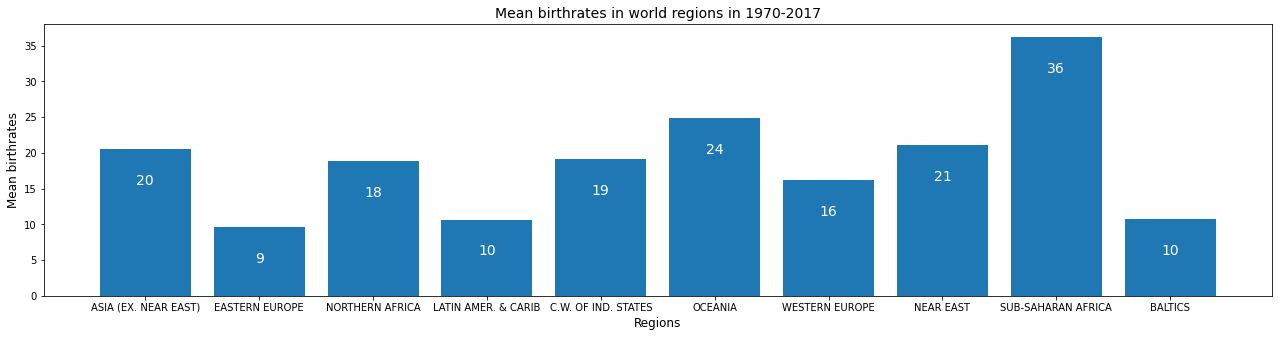

In [9]:
plt.figure(figsize=(22, 5))
bar = plt.bar(data['Region'].unique(), (data.groupby('Region'))['Birthrate'].mean())
plt.title('Mean birthrates in world regions in 1970-2017', fontsize = 14)
plt.xlabel('Regions', fontsize = 12)
plt.ylabel('Mean birthrates', fontsize = 12)

for k in bar:
  plt.gca().text(k.get_x() + k.get_width() / 2, k.get_height() - 5, str(int(k.get_height())), ha = 'center', color = 'white', fontsize = 14)

plt.show()

We can say that the values are pretty different. Let's see whether our observation is statistically significant.



We perform **one-way ANOVA test (F test)**:

$H_{0}$: $\mu_1 = $ $\mu_2 = $ $\mu_3 = $ $\mu_4 = $ $\mu_5 = $ $\mu_6 = $ $\mu_7 = $ $\mu_8 = $ $\mu_9 = $ $\mu_{10} = $ $\mu_{11}$ <br>

$H_{a}$: Not all $\mu_{i}$'s are equal, where $ i = 1, 2, ... 11$<br>

with significance level $\alpha = 0.05 $

($\mu_1$, $\mu_2$, $\mu_3$, $\mu_4$, $\mu_5$, $\mu_6$, $\mu_7$, $\mu_8$, $\mu_9$, $\mu_{10}$, $\mu_{11}$ - mean birthrates of regions given in alphabetical order) 

In [10]:
asia = data[data['Region'] == 'ASIA (EX. NEAR EAST)']['Birthrate']
baltics = data[data['Region'] == 'BALTICS']['Birthrate']
cis = data[data['Region'] == 'C.W. OF IND. STATES']['Birthrate']
eastern_europe = data[data['Region'] == 'EASTERN EUROPE']['Birthrate']
latin_america = data[data['Region'] == 'LATIN AMER. & CARIB']['Birthrate']
near_east = data[data['Region'] == 'NEAR EAST']['Birthrate']
northern_africa = data[data['Region'] == 'NORTHERN AFRICA']['Birthrate']
oceania = data[data['Region'] == 'OCEANIA']['Birthrate']
sub_saharan_africa = data[data['Region'] == 'SUB-SAHARAN AFRICA']['Birthrate']
western_europe = data[data['Region'] == 'WESTERN EUROPE']['Birthrate']

In [11]:
# Performing F-test
stats.f_oneway(asia, baltics, cis, eastern_europe, latin_america, near_east, northern_africa, oceania, sub_saharan_africa, western_europe)

F_onewayResult(statistic=26.583448044859722, pvalue=3.5616352949134917e-28)

As the $$ pvalue \text{ = 3.561635294913532e-28 } < \alpha = 0.05 $$

We $Reject \text{ $H_{0}$}$.

This means we have enough evidence to state that **not all geographical regions have same mean birthrates** at 5% significance level, so there is indeed a difference between the mean birthrates in all geographical regions.

**Answer**: The mean birthrates in all geographical regions in a period of 1970-2017 are different.

### 2) Is there a relationship between literacy rate and GDP per capita for the world countries?

**Literacy rate (%)** is the percentage of adult population (ages 15 and above) that can read and write.

**GDP(Gross Domestic Product) per capita($)** is a country's GDP divided by its total population.

To answer this question, we start with plotting a line graph with GDP per capita on x-axis and literacy on y-axis.

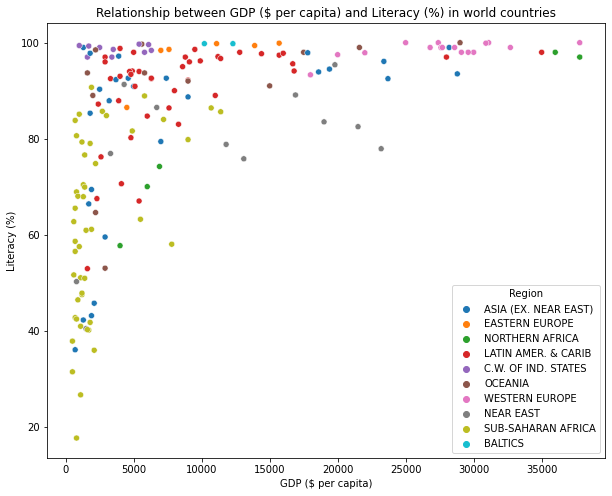

In [12]:
plt.figure(figsize = (10, 8))
plt.title('Relationship between GDP ($ per capita) and Literacy (%) in world countries')
sns.scatterplot(data = data, x = 'GDP ($ per capita)', y = 'Literacy (%)', hue = 'Region')
plt.show()

Looking at this graph, we can see certain relationship between these two variables. So, let's check correlation between them by doing **Pearson's r coefficient test.**

In [13]:
coeff, pvalue = stats.pearsonr(data['GDP ($ per capita)'], data['Literacy (%)'])
print(coeff)

0.5228801301297111


We can also verify our observation for correlation value using the correlation matrix, then checking the intersection between 'GDP ($ per capita)' and 'Literacy (%)' values: it also gives 0.52.

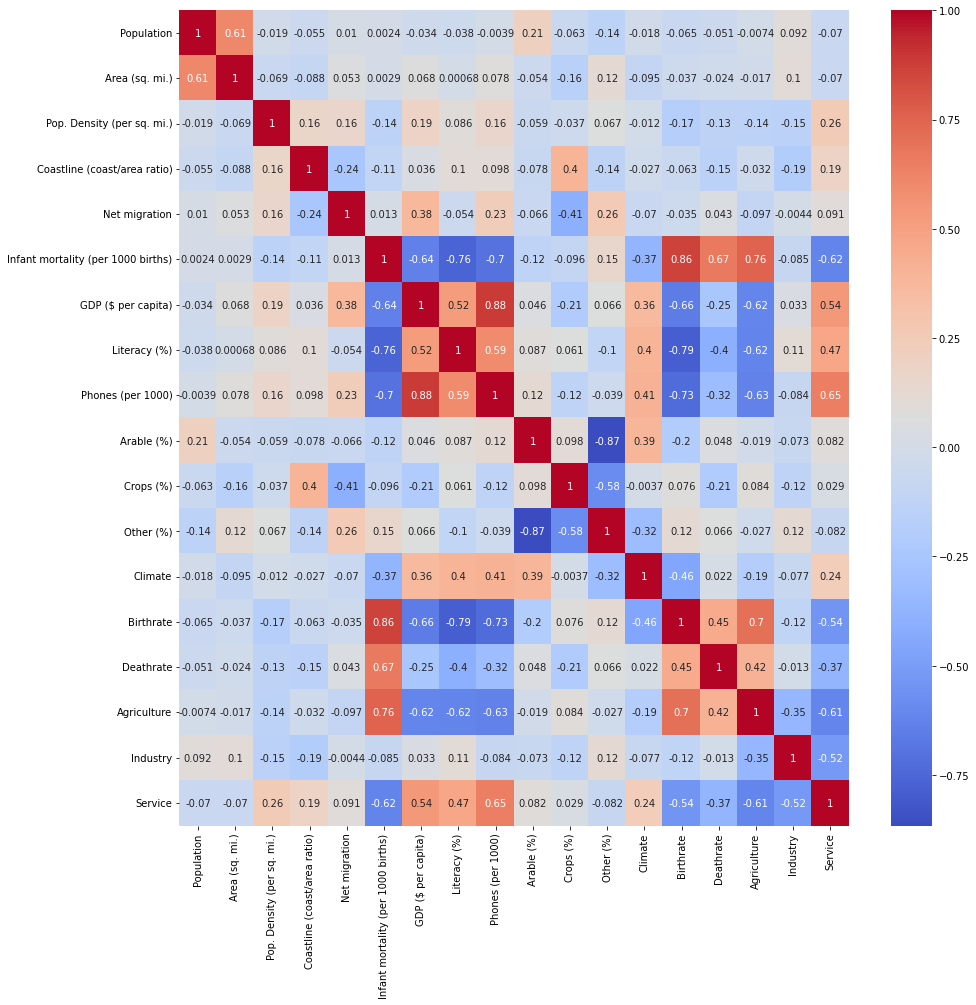

In [14]:
plt.figure(figsize=(15, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

Looking at the value of Pearson's r coefficient (0.52), we can conclude there is a *medium correlation* between area and population of world countries.

Correlation degree is moderate.

Indeed, it is not enough to make conclusions about relationship of these variables. Therefore, we check for simple linear regression.

In [15]:
# Creating simple linear regression model 

literacy = data['Literacy (%)']
gdp = data['GDP ($ per capita)']

from statsmodels.formula.api import ols
model = ols("literacy ~ gdp", data).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
# Checking the R-squared value for our simple linear regression model 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               literacy   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     66.60
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           5.99e-14
Time:                        15:45:23   Log-Likelihood:                -759.68
No. Observations:                 179   AIC:                             1523.
Df Residuals:                     177   BIC:                             1530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.1291      1.747     41.282      0.0

We obtained a R-squared value of 0.273, meaning that this simple regression model explains 27.3% of the variation in the response variable (literacy) around its mean. 

It means that the simple linear regression model doesn't fit our data well. So, the relationship between GDP per capita and literacy is not linear.

**Answer:** There is a relationship between GDP per capita and literacy for all world countries. These two variables have a moderate correlation, but do not have a linear relationship.

### 3) Does the mean service sector percentage differ between Western and Eastern Europe?

Economies of all countries are separated into 3 sectors: agriculture, industry and service, which totally make up 100%. 

**Service sector** involves services instead of end products.

In this question I will work on ratio of service section in countries of Western and Eastern Europe.

Let's see what the mean service sector percentage values are for all of the world countries.

In [17]:
(data.groupby('Region'))['Service'].mean()

Region
ASIA (EX. NEAR EAST)    0.518038
BALTICS                 0.682500
C.W. OF IND. STATES     0.463200
EASTERN EUROPE          0.599167
LATIN AMER. & CARIB     0.647167
NEAR EAST               0.477333
NORTHERN AFRICA         0.603600
OCEANIA                 0.607500
SUB-SAHARAN AFRICA      0.455234
WESTERN EUROPE          0.681353
Name: Service, dtype: float64

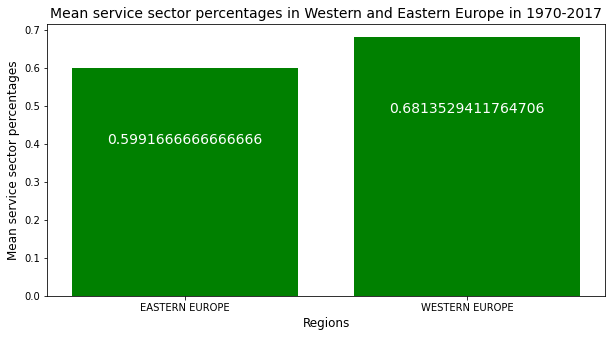

In [18]:
europe = data[(data['Region'] == 'WESTERN EUROPE') | (data['Region'] == 'EASTERN EUROPE')]

plt.figure(figsize=(10, 5))
bar2 = plt.bar(europe['Region'].unique(), (europe.groupby('Region'))['Service'].mean(), color = 'green')
plt.title('Mean service sector percentages in Western and Eastern Europe in 1970-2017', fontsize = 14)
plt.xlabel('Regions', fontsize = 12)
plt.ylabel('Mean service sector percentages', fontsize = 12)

for k in bar2:
  plt.gca().text(k.get_x() + k.get_width() / 2, k.get_height() - 0.2, str(k.get_height()), ha = 'center', color = 'white', fontsize = 14)

plt.show()

From these two values that were observed in bar chart above, we can see that the mean value of the service sector percentage in Western and Eastern Europe are different. Nevertheless, we have to make sure that our observation is statistically significant.

We perform **Independent t-test** as quantitative groups come from different populations.

$H_{0}$: $\mu_1 = $ $\mu_2$ <br>

$H_{a}$: $\mu_1 \neq \mu_2 $<br>

with significance level $\alpha = 0.05 $

($\mu_1$, $\mu_2$ - mean values of the service sector percentage in the order they are given)

In [19]:
# Performing independent t-test

western = data[data['Region'] == 'WESTERN EUROPE']['Service']
eastern = data[data['Region'] == 'EASTERN EUROPE']['Service']
stats.ttest_ind(western, eastern)

Ttest_indResult(statistic=2.380898690528339, pvalue=0.026815358462783642)

As the $$ pvalue \text{ = 0.026815358462783642 } < \alpha = 0.05 $$

We $Reject \text{ $H_{0}$}$.

This means we have enough evidence to state that **Western and Eastern Europe regions have different mean service sector percentages.**

**Answer:** The mean service sector percentage is different in Western and Eastern Europe in a period of 1970-2017.

## Conclusion

To conclude, I was able to answer some questions about different economic indicators of world countries: demography (birthrates), economics (GDP per capita, service sector), education (literacy).

It was observed that: <br>
- The mean birthrates in all geographical regions in a period of 1970-2017 are different.
- There is a relationship between GDP per capita and literacy rate for all of the world countries, they have a medium correlation but not a linear relationship.
- The mean service sector percentage is different in Western and Eastern Europe in a period of 1970-2017.

This conclusions can be interpreted as follows:
- All of the geographical regions of the world show different patterns in demography, giving different values of birthrates. 
- Generally, high GDP per capita results in high literacy. Despite, literacy rate can't be described using GDP per capita by some linear function.
- Western and Eastern Europe have a little different structures in their sectors of economies despite the close values of mean service sector percentage.

In general, countries in one region tend to have comparably close values for the selected economic indicators, so we can observe that geographical location is one of hidden factors that affected all of these economic indicators.

All of these conclusions were verified using visualization tools and relevant statistical tests showing the statistical significance of inferences that were made. (bar chart, scatter plot, correlation matrix, one-way ANOVA test, Pearson's r test, simple linear regression test, independent t-test)

## Discussion

First of all, this statistical research doesn't involve all of the countries in the world, as the entire Northern America region was dropped due to the fact that all countries in this region had an empty(NaN) value for certain columns (variables). As the research doesn't involve one continent, inferences that I made don't have that much of statistical significance for the world. 

Secondly, I did not go further than simple linear regression. I could have made very interesting inferences regarding the impact of all the included variables on a certain economic indicator. This kind of information would be something valuable to learn from such a project. Hopefully in Project-2, it will be possible to perform different kinds of linear regression models on my data.

Dataset lacks novelty. It only includes data up to 2017 year. Thereby the inferences that are made there can be not as relevant for 2022. 

If I was able to start over this project, I would start being more careful about each of the variables. I spent too much time on the project, even missing the deadline, without understanding that the values in Region column could not be called just because the creator of the dataset inserted lots of spaces. Due to this, I redid all of the tests, attempted all the possible options, even changed the dataset at one time that I tried to risk using without understanding some of the variables that were there. Also, I didn't know how to deal with commas as a decimal separator sign, which made the type of lots of variables 'object' rather than 'float64' to the point that I started retyping values in Excel. So, next time first thing I do will be checking all the variables. 

Also, addressing the weaknesses of my work, next time I will collect all the data myself, from World Bank and US Government websites that are listed in sources of my dataset for a period 2017-2021. This will make me able to include Northern America and certain countries that were missed due to lack of some data in dataset chosen.

*Commentary from the author:* I sincerely apologize for submitting this work later than the deadline, it was bunch of the factors involving health issues too. I will accept any decision you make with respect.